In [1]:
import numpy as np

from subgraph import YaleStarCatalog, StarDatabase
from utils import *

font_setting()
cmap = plt.get_cmap("ocean")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
### probrem setting
# os
log_dir = "./log/obs_stars/"
seed = 100
# param
U = 1024
theta_FOV = 20

### compute params
seed_seq = np.random.SeedSequence(seed)
np_random = np.random.Generator(np.random.PCG64(seed_seq))
theta_res = np.arctan2(2 * np.tan(theta_FOV / 2), U)
epsilon = 2 * np.sqrt(2) * theta_res
theta_min = epsilon
theta_max = 2 * np.arctan(np.sqrt(2) * np.tan(theta_FOV / 2))

theta_FOV_list = [5, 10, 20, 40, 80]
M_lim_list = [3.5, 4.5, 5.5]
beta_list = [0.0, 0.2, 0.4, 0.6, 0.8]


----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
----- Star Database -----
the number of stars : 861
the range of magnitude : [-1.46, 4.49]
----- Star Database -----
the number of stars : 279
the range of magnitude : [-1.46, 3.49]


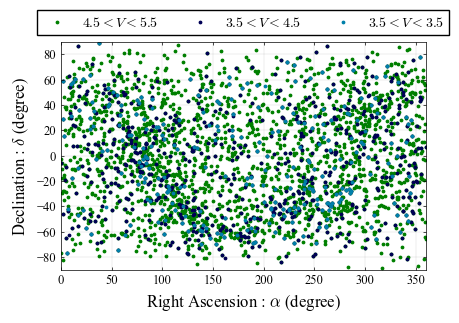

In [3]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# plot 
fig = plt.figure(figsize=(4.8, 3), dpi=100)
ax = fig.add_subplot(111)
s = 3
# 
# lb = 5.5
# M_lim = 6.5
# D_DB = StarDatabase(df_D_C)
# D_DB.filtering_by_visual_magnitude(M_lim)
# D_DB.filtering_by_multiple_stars(theta_min)
# D_DB.get_info()
# kwargs = {"s": s, "color": cmap(0/4), "label": f"$V<{M_lim}$"}
# ax.scatter(D_DB.get_RA() * 180 / np.pi, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(0/3), "label": f"${lb}<V<{M_lim}$"}
ax.scatter(D_DB.get_RA() * 180 / np.pi, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
lb = 3.5
M_lim = 4.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(1/3), "label": f"${lb}<V<{M_lim}$"}
ax.scatter(D_DB.get_RA() * 180 / np.pi, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
M_lim = 3.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": cmap(2/3), "label": f"${lb}<V<{M_lim}$"}
ax.scatter(D_DB.get_RA() * 180 / np.pi, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
ax.set_xlabel('Right Ascension : $\\alpha$ (degree)')
ax.set_ylabel('Declination : $\\delta$ (degree)')
ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)
ax.legend(bbox_to_anchor=(0.5, 1.0), loc="lower center", ncol=4)

fig.savefig(f"{log_dir}/star_distribution.pdf", bbox_inches='tight')

In [4]:
def line_gene(path):
    with open(path, "r") as f:
        for line in f:
            yield line

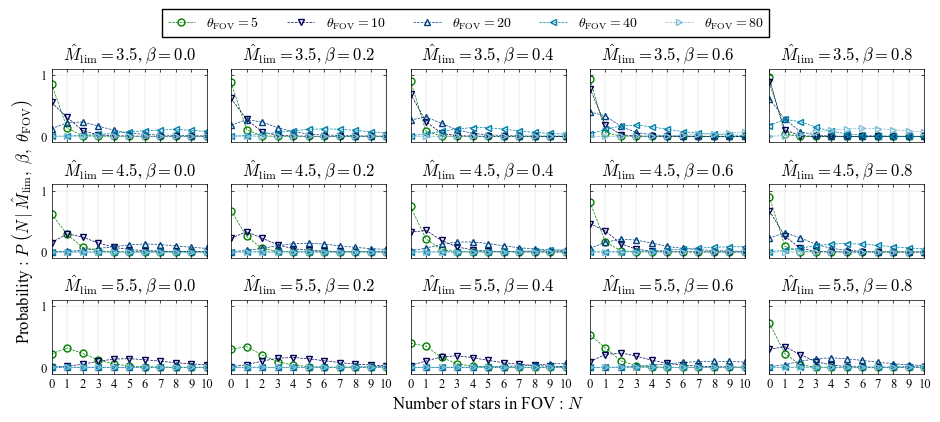

In [5]:
fig, axes = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(4.8*2, 4), dpi=100)

axes[2, 2].set_xlabel('Number of stars in FOV : $N$')
axes[1, 0].set_ylabel('Probability : $P \\ \\left(N \\mid \\hat{M}_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
axes[0, 0].set_xlim(0, 8)
axes[0, 0].set_ylim(-0.1, 1.1)
axes[0, 0].set_xticks(list(range(0, 11))) 
axes[0, 0].set_xticklabels(list(range(0, 11)))

markers = ["o", "v", "^", "<", ">"]
colors = [cmap(0/6), cmap(2/6), cmap(3/6), cmap(4/6), cmap(5/6)]
kwargs = {"ls": "dashed", "lw": 0.5, "markersize": 5, "markerfacecolor":'none'}

M_lim = 3.5
for ii, beta in enumerate(beta_list):
    ax = axes[0, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        ax.plot(range(len(pN)), pN, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 4.5
for ii, beta in enumerate(beta_list):
    ax = axes[1, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        ax.plot(range(len(pN)), pN, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 5.5
for ii, beta in enumerate(beta_list):
    ax = axes[2, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        ax.plot(range(len(pN)), pN, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

lines_labels = [axes[0, 0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.01), loc="center", ncol=5)

fig.tight_layout()
fig.savefig(f"{log_dir}/obs_distribution.pdf", bbox_inches='tight')

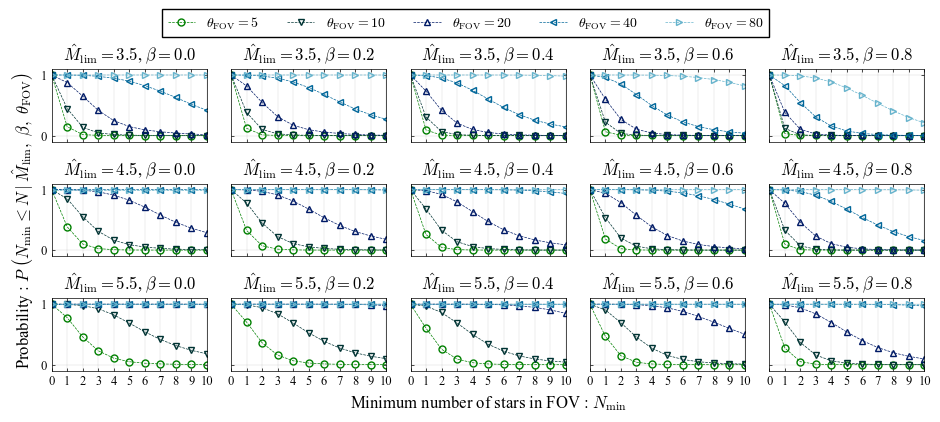

In [6]:
fig, axes = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(4.8*2, 4), dpi=100)

axes[2, 2].set_xlabel('Minimum number of stars in FOV : $N_{\\mathrm{min}}$')
axes[1, 0].set_ylabel('Probability : $P \\ \\left(N_{\\mathrm{min}} \\leq N \\mid \\hat{M}_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
axes[0, 0].set_xlim(0, 8)
axes[0, 0].set_ylim(-0.1, 1.1)
axes[0, 0].set_xticks(list(range(0, 11))) 
axes[0, 0].set_xticklabels(list(range(0, 11)))

markers = ["o", "v", "^", "<", ">"]
kwargs = {"ls": "dashed", "lw": 0.5, "markersize": 5, "markerfacecolor":'none'}

M_lim = 3.5
for ii, beta in enumerate(beta_list):
    ax = axes[0, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        pN_cum = [sum(pN[i:]) for i in range(len(pN))]
        ax.plot(range(len(pN)), pN_cum, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 4.5
for ii, beta in enumerate(beta_list):
    ax = axes[1, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        pN_cum = [sum(pN[i:]) for i in range(len(pN))]
        ax.plot(range(len(pN)), pN_cum, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 5.5
for ii, beta in enumerate(beta_list):
    ax = axes[2, ii]
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": cmap(i/len(theta_FOV_list)), "marker": markers[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        pN_cum = [sum(pN[i:]) for i in range(len(pN))]
        ax.plot(range(len(pN)), pN_cum, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

lines_labels = [axes[0, 0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.01), loc="center", ncol=5)

fig.tight_layout()
fig.savefig(f"{log_dir}/obs_cum_distribution.pdf", bbox_inches='tight')

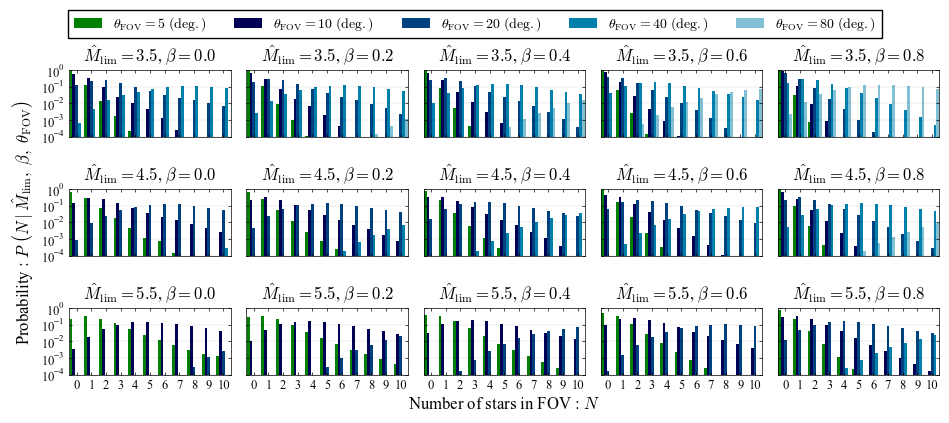

In [7]:
fig, axes = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(4.8*2, 4), dpi=100)

axes[2, 2].set_xlabel('Number of stars in FOV : $N$')
axes[1, 0].set_ylabel('Probability : $P \\ \\left(N \\mid \\hat{M}_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
axes[0, 0].set_xlim(-0.5, 10.5)
axes[0, 0].set_ylim(1e-4, 1e0)
axes[0, 0].set_yscale("log")
axes[0, 0].set_xticks(list(range(0, 11))) 
axes[0, 0].set_xticklabels(list(range(0, 11)))
axes[0, 0].set_yticks([1e-4,1e-3,1e-2,1e-1,1e0]) 

markers = ["o", "v", "^", "<", ">"]
kwargs = {"ls": "dashed", "lw": 0.5}

M_lim = 3.5
for ii, beta in enumerate(beta_list):
    ax = axes[0, ii]
    ax.grid(visible=None, axis='x')
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"+"$\\ \\mathrm{(deg.)}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(pN))]
        ax.bar(center, pN, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 4.5
for ii, beta in enumerate(beta_list):
    ax = axes[1, ii]
    ax.grid(visible=None, axis='x')
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"+"$\\ \\mathrm{(deg.)}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(pN))]
        ax.bar(center, pN, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 5.5
for ii, beta in enumerate(beta_list):
    ax = axes[2, ii]
    ax.grid(visible=None, axis='x')
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"+"$\\ \\mathrm{(deg.)}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(pN))]
        ax.bar(center, pN, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

lines_labels = [axes[0, 0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.01), loc="center", ncol=5)

fig.tight_layout()
fig.savefig(f"{log_dir}/obs_distribution_bar.pdf", bbox_inches='tight')

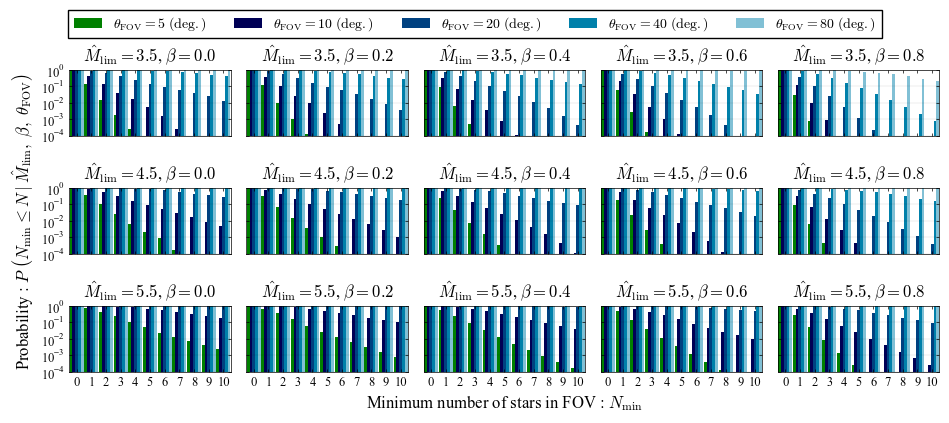

In [8]:
fig, axes = plt.subplots(3, 5, sharex=True, sharey=True, figsize=(4.8*2, 4), dpi=100)

axes[2, 2].set_xlabel('Minimum number of stars in FOV : $N_{\\mathrm{min}}$')
axes[1, 0].set_ylabel('Probability : $P \\ \\left(N_{\\mathrm{min}} \\leq N \\mid \\hat{M}_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
axes[0, 0].set_xlim(-0.5, 10.5)
axes[0, 0].set_ylim(1e-4, 1e0)
axes[0, 0].set_yscale("log")
axes[0, 0].set_xticks(list(range(0, 11))) 
axes[0, 0].set_xticklabels(list(range(0, 11)))
axes[0, 0].set_yticks([1e-4,1e-3,1e-2,1e-1,1e0]) 

markers = ["o", "v", "^", "<", ">"]
kwargs = {"ls": "dashed", "lw": 0.5}

M_lim = 3.5
for ii, beta in enumerate(beta_list):
    ax = axes[0, ii]
    ax.grid(visible=None, axis='x')
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"+"$\\ \\mathrm{(deg.)}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        pN_cum = [sum(pN[i:]) for i in range(len(pN))]
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(pN))]
        ax.bar(center, pN_cum, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 4.5
for ii, beta in enumerate(beta_list):
    ax = axes[1, ii]
    ax.grid(visible=None, axis='x')
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"+"$\\ \\mathrm{(deg.)}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        pN_cum = [sum(pN[i:]) for i in range(len(pN))]
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(pN))]
        ax.bar(center, pN_cum, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

M_lim = 5.5
for ii, beta in enumerate(beta_list):
    ax = axes[2, ii]
    ax.grid(visible=None, axis='x')
    for i, theta_FOV in enumerate(theta_FOV_list):
        kwargs.update({"color": colors[i], "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"+"$\\ \\mathrm{(deg.)}$"})
        path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
        pN = [float(line) for line in line_gene(path)]
        pN_cum = [sum(pN[i:]) for i in range(len(pN))]
        width = 0.95 * 1/len(theta_FOV_list)
        center = [N+(i-int(len(theta_FOV_list)/2))*width for N in range(len(pN))]
        ax.bar(center, pN_cum, align='center', width=width, **kwargs)
    # ax.legend()
    ax.set_title("$\\hat{M}_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

lines_labels = [axes[0, 0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, 1.01), loc="center", ncol=5)

fig.tight_layout()
fig.savefig(f"{log_dir}/obs_cum_distribution_bar.pdf", bbox_inches='tight')

In [9]:

# for beta in beta_list:

#     fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(4.8*2, 5), dpi=100)

#     M_lim = 3.5
#     ax = axes[0, 0]
#     for i, theta_FOV in enumerate(theta_FOV_list):
#         kwargs = {"ls": "dashed", "lw": 0.5, "color": cmap(i/len(theta_FOV_list)), "marker":".", "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"}
#         path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
#         pN = [float(line) for line in line_gene(path)]
#         ax.plot(range(len(pN)), pN, **kwargs)
#     # ax.set_xlabel('$N$ : Number of stars in field of view')
#     ax.set_ylabel('$P \\ \\left(N = N_{\\mathrm{obs}} \\mid M_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
#     ax.set_xlim(0, 30)
#     ax.set_ylim(0, 1)
#     # ax.legend()
#     ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

#     M_lim = 4.5
#     ax = axes[0, 1]
#     for i, theta_FOV in enumerate(theta_FOV_list):
#         kwargs = {"ls": "dashed", "lw": 0.5, "color": cmap(i/len(theta_FOV_list)), "marker":".", "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"}
#         path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
#         pN = [float(line) for line in line_gene(path)]
#         ax.plot(range(len(pN)), pN, **kwargs)
#     # ax.set_xlabel('$N_{\\mathrm{obs}}$ : Number of stars in field of view')
#     # ax.set_ylabel('$P \\ \\left(N = N_{\\mathrm{obs}} \\mid M_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
#     ax.set_xlim(0, 30)
#     ax.set_ylim(0, 1)
#     # ax.legend()
#     ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

#     M_lim = 5.5
#     ax = axes[0, 2]
#     for i, theta_FOV in enumerate(theta_FOV_list):
#         kwargs = {"ls": "dashed", "lw": 0.5, "color": cmap(i/len(theta_FOV_list)), "marker":".", "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"}
#         path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
#         pN = [float(line) for line in line_gene(path)]
#         ax.plot(range(len(pN)), pN, **kwargs)
#     # ax.set_xlabel('$N_{\\mathrm{obs}}$ : Number of stars in field of view')
#     # ax.set_ylabel('$P \\ \\left(N = N_{\\mathrm{obs}} \\mid M_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
#     ax.set_xlim(0, 30)
#     ax.set_ylim(0, 1)
#     ax.legend()
#     ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

#     M_lim = 3.5
#     ax = axes[1, 0]
#     for i, theta_FOV in enumerate(theta_FOV_list):
#         kwargs = {"ls": "dashed", "lw": 0.5, "color": cmap(i/len(theta_FOV_list)), "marker":".", "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"}
#         path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
#         pN = [float(line) for line in line_gene(path)]
#         pN_cum = [sum(pN[:i+1]) for i in range(len(pN))]
#         ax.plot(range(len(pN)), pN_cum, **kwargs)
#     ax.set_xlabel('$N_{\\mathrm{obs}}$ : Number of stars in field of view')
#     ax.set_ylabel('$P \\ \\left(N \\leq N_{\\mathrm{obs}} \\mid M_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
#     ax.set_xlim(0, 30)
#     ax.set_ylim(0, 1)
#     # ax.legend()
#     # ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

#     M_lim = 4.5
#     ax = axes[1, 1]
#     for i, theta_FOV in enumerate(theta_FOV_list):
#         kwargs = {"ls": "dashed", "lw": 0.5, "color": cmap(i/len(theta_FOV_list)), "marker":".", "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"}
#         path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
#         pN = [float(line) for line in line_gene(path)]
#         pN_cum = [sum(pN[:i+1]) for i in range(len(pN))]
#         ax.plot(range(len(pN)), pN_cum, **kwargs)
#     ax.set_xlabel('$N_{\\mathrm{obs}}$ : Number of stars in field of view')
#     # ax.set_ylabel('$P \\ \\left(N \\leq N_{\\mathrm{obs}} \\mid M_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
#     ax.set_xlim(0, 30)
#     ax.set_ylim(0, 1)
#     # ax.legend()
#     # ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

#     M_lim = 5.5
#     ax = axes[1, 2]
#     for i, theta_FOV in enumerate(theta_FOV_list):
#         kwargs = {"ls": "dashed", "lw": 0.5, "color": cmap(i/len(theta_FOV_list)), "marker":".", "label": "$\\theta_{\\mathrm{FOV}}=$"+f"${theta_FOV}$"}
#         path = f"{log_dir}/hist_FOV{theta_FOV}_M{M_lim}_beta{beta}.dat"
#         pN = [float(line) for line in line_gene(path)]
#         pN_cum = [sum(pN[:i+1]) for i in range(len(pN))]
#         ax.plot(range(len(pN)), pN_cum, **kwargs)
#     ax.set_xlabel('$N_{\\mathrm{obs}}$ : Number of stars in field of view')
#     # ax.set_ylabel('$P \\ \\left(N \\leq N_{\\mathrm{obs}} \\mid M_{\\mathrm{lim}},\\ \\beta,\\ \\theta_{\\mathrm{FOV}}\\right)$')
#     ax.set_xlim(0, 30)
#     ax.set_ylim(0, 1)
#     # ax.legend()
#     # ax.set_title("$M_{\\mathrm{lim}}=$"+f"${M_lim}$" + ", $\\beta=$"+f"${beta}$")

#     fig.tight_layout()
#     fig.savefig(f"{log_dir}/obs_distribution_beta{beta}.pdf", bbox_inches='tight')